# Linear regression on projections

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
import src.operate_datasets    as operate_datasets
import src.model_visualisation as model_visualisation
import src.model_evaluation    as model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'projection')

In [4]:
scifi_x, scifi_x, up_mu, down_mu_x, down_mu_y = full_X.T

X_arr = []

for i in range(full_X.shape[0]):
    flat_vec = np.concatenate([scifi_x  [i].flatten(), 
                               scifi_x  [i].flatten(),
                               up_mu    [i].flatten(),
                               down_mu_x[i].flatten(),
                               down_mu_y[i].flatten()])
    X_arr.append(flat_vec)
    
full_X = np.array(X_arr)

In [5]:
X_train, y_train, X_test, y_test = operate_datasets.split_dataset(full_X, full_y)

In [6]:
min_clip = 0
#X_train, y_train = operate_datasets.clip_dataset(X_train, y_train, min_clip)

In [7]:
X_train.shape

(86400, 2447)

## Fit regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [9]:
model = LinearRegression().fit(X_train, y_train) # positive=True ?
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = model.score(X_train, y_train)

print('L2: ', score_l2)

y_pred = model.predict(X_train)

L2:  0.3521724830447497


## Visualise results

In [10]:
X_sum = X_train.sum(axis=1).reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [11]:
print('y = kx + b')
print('k', model.coef_)
print('b', model.intercept_)

y = kx + b
k [ 7.97336847e+09 -1.55011283e+10 -6.63264127e+08 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
b 0.1302175673561843


In [12]:
model_name = 'L2 on projections'
save_file_prefix = model_name.replace(' ', '-')

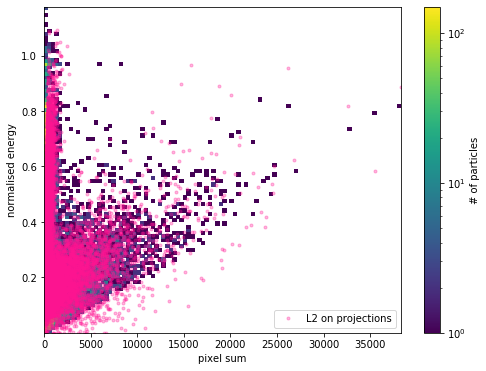

In [13]:
model_visualisation.plot_2d_energy_hist(X_sum, y_train, y_pred, model_name,
                                        save_file_prefix=save_file_prefix) 

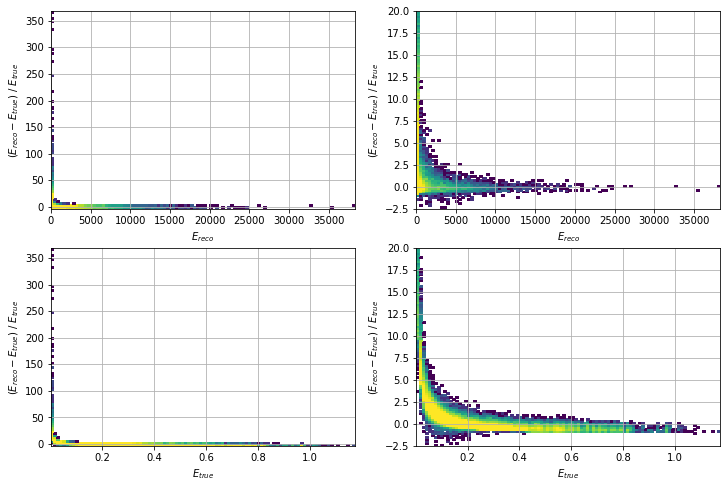

In [14]:
model_visualisation.plot_res_vs_energy(X_sum, y_train, y_pred,
                                       save_file_prefix=save_file_prefix) 

mean   = 1.40061e+00
std    = 5.60271e+00
median = 2.43170e-01


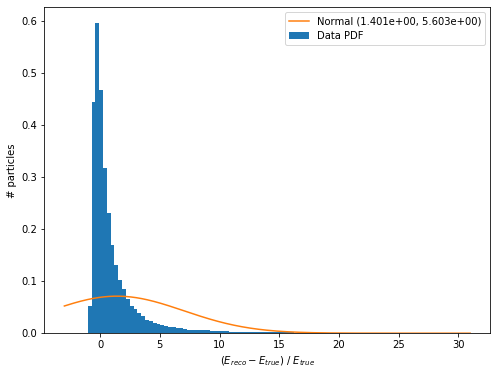

In [15]:
model_visualisation.plot_res_hist_fit(y_train, y_pred, (-2, 30),
                                      save_file_prefix=save_file_prefix)

In [16]:
model_evaluation.save_scores(y_train, y_pred, save_file_prefix)

explained_variance_score 0.35217252511377595
max_error 1.083276373152675
mean_absolute_error 0.1072319472804094
mean_squared_error 0.020750260479438322
median_absolute_error 0.08733891890468554
r2_score 0.3521724830447497


,L2-on-projections
explained_variance_score,0.352173
max_error,1.083276
mean_absolute_error,0.107232
mean_squared_error,0.020750
median_absolute_error,0.087339
r2_score,0.352172
avg_resolution,1.400614
std_resolution,5.602714


## Validation

In [17]:
X_sum_test = X_test.sum(axis=1).reshape(-1,1)
y_test = y_test.reshape(-1,1)

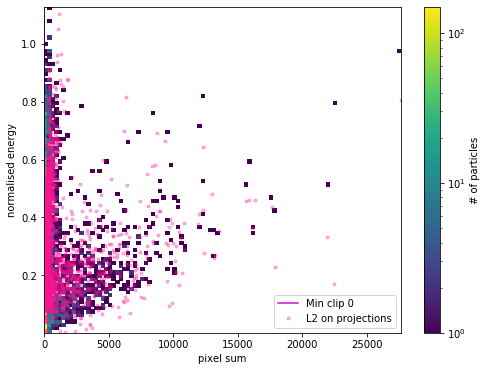

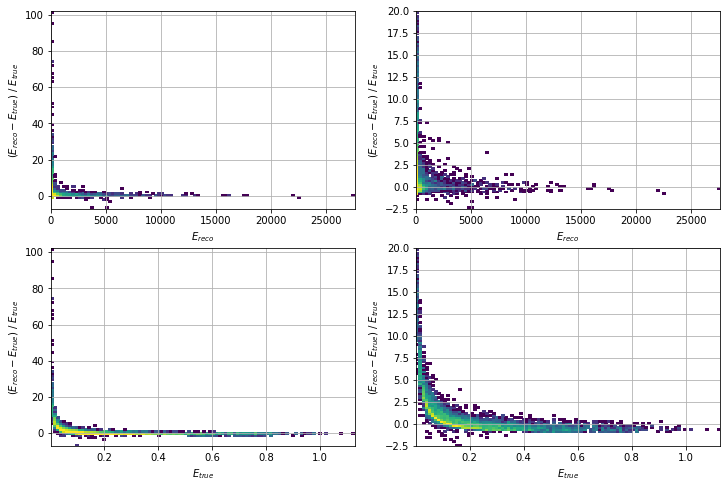

mean   = 1.32415e+00
std    = 4.06118e+00
median = 2.62394e-01


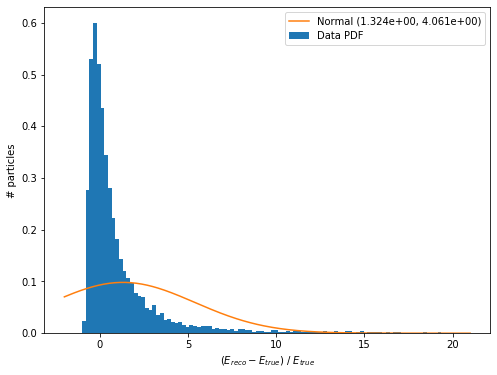

explained_variance_score 0.33775612176464087
max_error 0.8059138075117325
mean_absolute_error 0.10779115458923781
mean_squared_error 0.020904569237126296
median_absolute_error 0.08796124199944673
r2_score 0.3376627607466425


,L2-on-projections
explained_variance_score,0.337756
max_error,0.805914
mean_absolute_error,0.107791
mean_squared_error,0.020905
median_absolute_error,0.087961
r2_score,0.337663
avg_resolution,1.324153
std_resolution,4.061178


In [18]:
y_pred_test = model.predict(X_test)


model_visualisation.plot_2d_energy_hist_clip(X_sum_test, y_test, y_pred_test, min_clip, model_name,
                                             save_file_prefix=save_file_prefix) 

model_visualisation.plot_res_vs_energy(X_sum_test, y_test, y_pred_test, vmax=150,
                                       save_file_prefix=save_file_prefix)  

model_visualisation.plot_res_hist_fit(y_test, y_pred_test, [-1,20],
                                      save_file_prefix=save_file_prefix)

model_evaluation.save_scores(y_test, y_pred_test, save_file_prefix, 
                             folder_path=model_evaluation.TEST_SCORES_DIR)